In [14]:
import numpy as np
import matplotlib.pyplot as plt 

# Dynamics of a particle
[Newton](https://es.wikipedia.org/wiki/Isaac_Newton)'s second law reads:

_The acceleration experienced by a particle is proportional to the force acting on it_


$$
\mathbf{F}(\mathbf{r},\mathbf{v},t) = m \mathbf{a}
$$

In [35]:
class state:
    '''Dynamical state consisting of the position of velocity.'''
    def __init__( self, position, velocity):
        if len(position) != len(velocity):
            raise ValueError(f"position {position} and velocity {velocity} must have the same dimensions")

        self.position = position
        self.velocity = velocity 

class particle:
    '''Point mass particle (in any number of dimensions).'''
    def __init__( self, mass, state ):
        if mass <= 0:
            raise ValueError( f"Particle mass should be strictly positive. Received: {mass}")
        self.mass = mass
        self.state = state
    
    @property
    def r(self):
        '''Particle position'''
        return self.state.position
    
    @property
    def v(self):
        '''Particle velocity'''
        return self.state.velocity
    

    def evolve(self, F, dt):
        '''Evolves the state of the particle using a forward Euler scheme: 
            du/dt = g(u,t)
            u_n+1 = u_n + Dt*g(u_n,t_n)
        '''
        m = self.mass
    
        self.state.position = self.r + self.v*dt
        self.state.velocity = self.v +  F( self.r, self.v ) / m * dt

## Example 1: Harmonic oscillator. 

In [36]:
N = 100
T = 10
t = np.linspace(0,T,N)
dt = t[1]-t[0]
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = 1
v[0] = 0
M = 2

p = particle( M, state( np.array((x[0],)), np.array((v[0],)) ) )

def F(x, v):
    return -x

In [37]:
for i in range(1,N):
    p.evolve(F,dt)
    x[i] = p.r
    v[i] = p.v

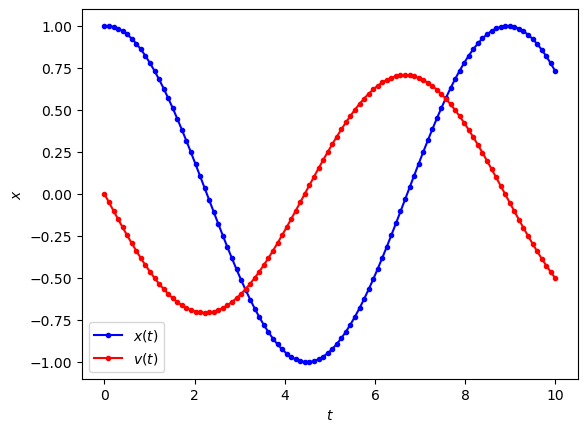

In [38]:
plt.plot(t,x, '.-b', label='$x(t)$')
plt.plot(t,v, '.-r', label='$v(t)$')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

## Example II: Earth orbit around the Sun.

In [45]:
N = 100
T = 10
t = np.linspace(0,T,N)
dt = t[1]-t[0]
x = [np.array((1,0))]
v = [np.array((0,0.5))]
M = 2

p = particle( M, state( x[0], v[0] ) )

def F(x, v):
    return -x/np.linalg.norm(x)**3

In [46]:
for i in range(1,N):
    p.evolve(F,dt)
    x.append(p.r)
    v.append(p.v)

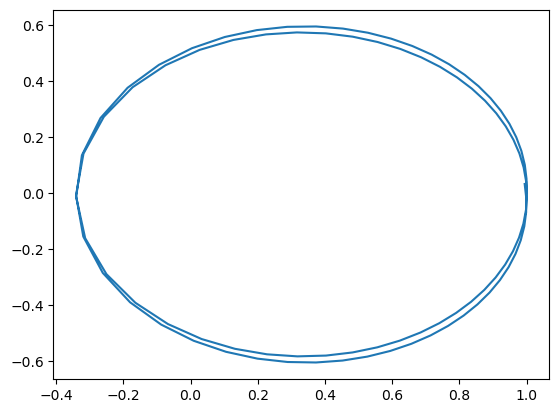

In [47]:
plt.plot([x_[0] for x_ in x], [x_[1] for x_ in x])

## Solid dynamics (probably in another entry)

In [49]:
class solid_state:
    '''Dynamical state consisting of the position of velocity.'''
    def __init__( self, position, velocity):
        if len(position) != len(velocity):
            raise ValueError(f"position {position} and velocity {velocity} must have the same dimensions")

        self.position = position
        self.attitude = attitude
        self.velocity = velocity
        self.angular_velocity = angular_velocity 


class solid:
    pass